In [1]:
import discretisedfield as df
import oommfc as oc
import micromagneticmodel as mm

In [2]:
import sys
sys.path.append('..')
from simtools import Strip

In [3]:
pattern = 'ixiooixx'
l = len(pattern) * 200e-9

In [4]:
s = Strip(l, 100e-9, 10e-9, 20e-9, '.', initpattern=pattern)

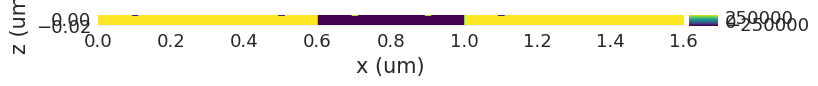

In [5]:
s.system.m.sel('y').z.mpl()

In [6]:
s.min_drive(fixed=True)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 10:45]... (426.1 s)


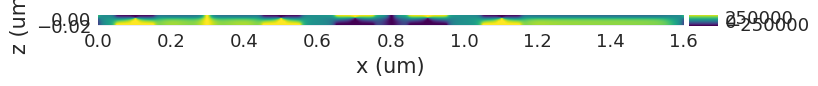

In [7]:
s.system.m.sel('y').z.mpl()

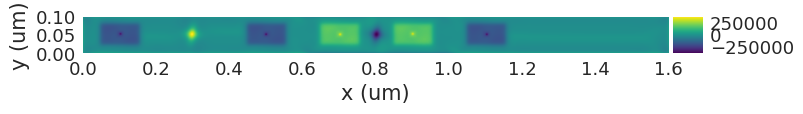

In [8]:
s.system.m.sel(z=1e-9).z.mpl()

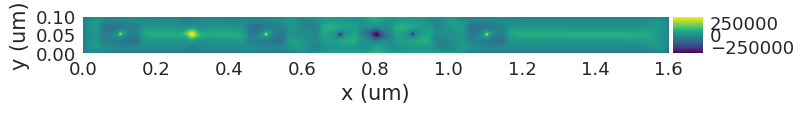

In [9]:
s.system.m.sel(z=-1e-9).z.mpl()

In [10]:
s.system.m.mesh.n

array([640,  40,  12])

In [11]:
mesh = df.Mesh(p1=s.system.m.mesh.region.pmin, p2=s.system.m.mesh.region.pmax, n=(640, 40, 12))  # TODO: 641 before

In [12]:
def wedge(x0s, y0, m):
    def init_Ms(p):
        x, y, z = p
        for x0 in x0s:
            if (y - y0) > m * (x - x0) and (y - y0) > -m * (x - x0):
                return 0
        return 384e3
    return init_Ms

field = df.Field(s.system.m.mesh, nvdim=3, value=s.system.m, norm=wedge([200e-9, 400e-9, 600e-9, 800e-9, 1000e-9, 1200e-9, 1400e-9], 70e-9, 1), valid='norm')

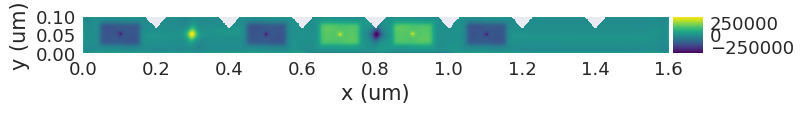

In [13]:
field.sel(z=1e-9).z.mpl()

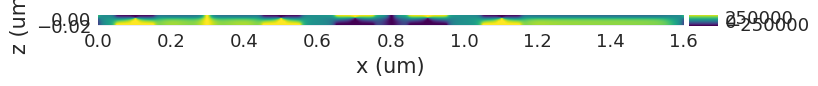

In [14]:
s.system.m = field
s.system.m.sel('y').z.mpl()

In [15]:
s.min_drive()

Running OOMMF (ExeOOMMFRunner)[2023/07/16 10:52]... (114.8 s)


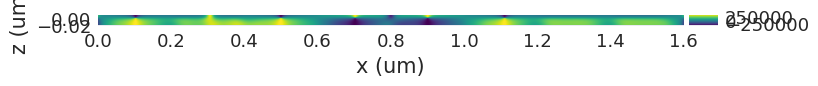

In [16]:
s.system.m.sel('y').z.mpl()

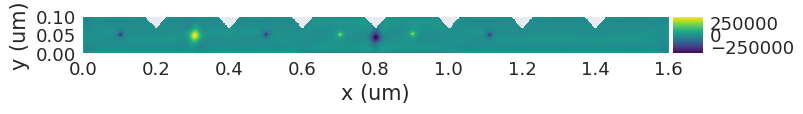

In [17]:
s.system.m.sel(z=1e-9).z.mpl()

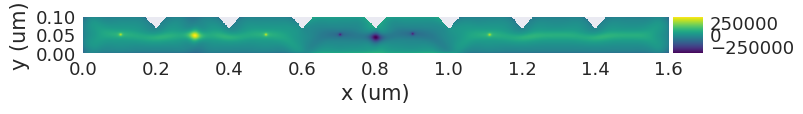

In [18]:
s.system.m.sel(z=-1e-9).z.mpl()

---
---

In [19]:
s.system.dynamics += mm.ZhangLi(u=(1, 0, 0), beta=0.56)

In [20]:
td = oc.TimeDriver()

---

In [21]:
j_distribution = df.Field.from_file('current-profile.omf')

In [22]:
j_distribution.valid = 'norm'

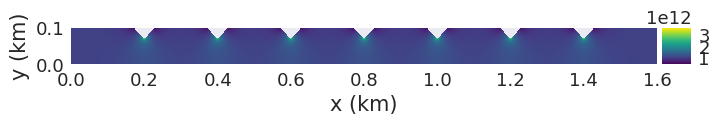

In [23]:
j_distribution.sel('z').norm.mpl()

In [24]:
j0_mean = j_distribution.norm.sel(x=(0, 150)).mean()
j0_mean

array([1.00053695e+12])

In [25]:
muB = 9.274e-24

def J2ux(J, P=.5):
    Ms = Strip.FeGe['Ms']
    return J * P * mm.consts.g * muB / (2 * mm.consts.e * Ms)

---

In [26]:
# j = 5e11
u_field = df.Field(mesh, nvdim=3, value=J2ux(j_distribution.array / 2), valid='norm')

In [27]:
s.system.dynamics.zhangli.u = u_field

In [28]:
td.drive(s.system, t=5e-9, n=100)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 10:54]... (7097.8 s)


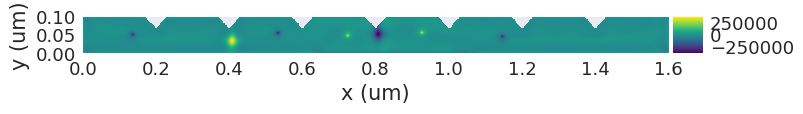

In [29]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [30]:
# j = 4e12
u_field = df.Field(mesh, nvdim=3, value=J2ux(j_distribution.array * 4), valid='norm')

In [31]:
s.system.dynamics.zhangli.u = u_field

In [32]:
td.drive(s.system, t=0.25e-9, n=25)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 12:52]... (380.3 s)


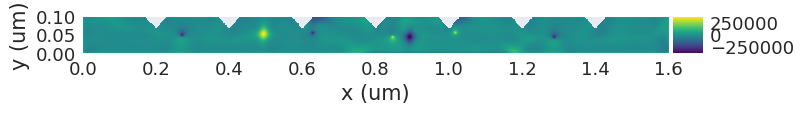

In [33]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [34]:
# j = 5e11
u_field = df.Field(mesh, nvdim=3, value=J2ux(j_distribution.array / 2), valid='norm')

In [35]:
s.system.dynamics.zhangli.u = u_field

In [36]:
td.drive(s.system, t=5e-9, n=100)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 12:59]... (7134.9 s)


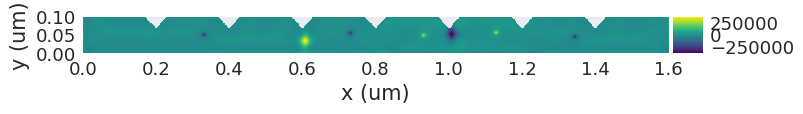

In [37]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [38]:
# j = 4e12
u_field = df.Field(mesh, nvdim=3, value=J2ux(j_distribution.array * 4), valid='norm')

In [39]:
s.system.dynamics.zhangli.u = u_field

In [40]:
td.drive(s.system, t=0.25e-9, n=25)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 14:58]... (393.2 s)


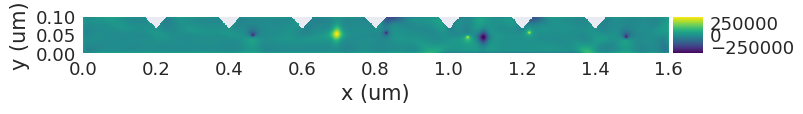

In [41]:
s.system.m.sel(z=1e-9).z.mpl()

---

In [42]:
j = 5e11
u_field = df.Field(mesh, nvdim=3, value=J2ux(j_distribution.array / 2), valid='norm')

In [43]:
s.system.dynamics.zhangli.u = u_field

In [44]:
td.drive(s.system, t=5e-9, n=100)

Running OOMMF (ExeOOMMFRunner)[2023/07/16 15:04]... (7444.5 s)


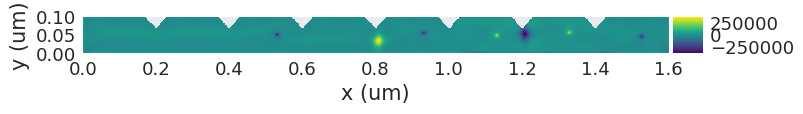

In [45]:
s.system.m.sel(z=1e-9).z.mpl()